Here I analyse the effect of Corona on rental bike by analysing datasets of April between 2018-2022. 

Reading the bike sharing datasets of 2017 -2022 

In [546]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
df_2017=pd.read_csv('2017Q2-capitalbikeshare-tripdata.csv',parse_dates=['Start date', 'End date'])
df_2018=pd.read_csv('201804-capitalbikeshare-tripdata.csv',parse_dates=['Start date', 'End date'])
df_2019=pd.read_csv('201904-capitalbikeshare-tripdata.csv',parse_dates=['Start date', 'End date'])
df_2020=pd.read_csv('202004-capitalbikeshare-tripdata.csv',parse_dates=['started_at', 'ended_at'])
df_2021=pd.read_csv('202104-capitalbikeshare-tripdata.csv',parse_dates=['started_at', 'ended_at'])
df_2022=pd.read_csv('202204-capitalbikeshare-tripdata.csv',parse_dates=['started_at', 'ended_at'])

In [566]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104418 entries, 0 to 1104417
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1104418 non-null  int64         
 1   Start date            1104418 non-null  datetime64[ns]
 2   End date              1104418 non-null  datetime64[ns]
 3   Start station number  1104418 non-null  int64         
 4   Start station         1104418 non-null  object        
 5   End station number    1104418 non-null  int64         
 6   End station           1104418 non-null  object        
 7   Bike number           1104418 non-null  object        
 8   Member type           1104418 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 75.8+ MB


In [401]:
print('2017',df_2017.columns)
print('2018',df_2018.columns)
print('2019',df_2019.columns)
print('2020',df_2020.columns)
print('2021',df_2021.columns)
print('2022',df_2022.columns)

2017 Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')
2018 Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')
2019 Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')
2020 Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
2021 Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 

Since columns are not identical in different datasets, I have to select identical columns and rename some of them

In [402]:
df_2017_reduced=df_2017[['Start date', 'End date','Member type']]
df_2018_reduced=df_2018[['Start date', 'End date','Member type']]
df_2019_reduced=df_2019[['Start date', 'End date','Member type']]
df_2020_reduced=df_2020[['started_at', 'ended_at','member_casual']].rename(columns={'started_at': 'Start date', 'ended_at' : 'End date',
'member_casual':'Member type'})
df_2020_reduced['Member type']=df_2020_reduced['Member type'].apply(lambda s: s.capitalize())

df_2021_reduced=df_2021[['started_at', 'ended_at','member_casual']].rename(columns={'started_at': 'Start date', 'ended_at' : 'End date',
'member_casual':'Member type'})
df_2021_reduced['Member type']=df_2021_reduced['Member type'].apply(lambda s: s.capitalize())
df_2022_reduced=df_2022[['started_at', 'ended_at','member_casual']].rename(columns={'started_at': 'Start date', 'ended_at' : 'End date',
'member_casual':'Member type'})
df_2022_reduced['Member type']=df_2022_reduced['Member type'].apply(lambda s: s.capitalize())


Create a total dataset of the data

In [403]:
df=pd.concat([df_2017_reduced, df_2018_reduced, df_2019_reduced, df_2020_reduced, df_2021_reduced, df_2022_reduced])
df

,Start date,End date,Member type
0,2017-04-01 00:00:22,2017-04-01 00:06:43,Member
1,2017-04-01 00:02:02,2017-04-01 00:11:53,Member
2,2017-04-01 00:02:32,2017-04-01 00:51:30,Casual
3,2017-04-01 00:03:02,2017-04-01 00:09:23,Member
4,2017-04-01 00:03:38,2017-04-01 00:10:41,Member
...,...,...,...
310430,2022-04-29 16:37:39,2022-04-29 16:43:29,Casual
310431,2022-04-24 18:53:10,2022-04-24 19:08:42,Casual
310432,2022-04-24 17:30:38,2022-04-24 18:38:49,Casual
310433,2022-04-27 18:38:55,2022-04-27 19:05:15,Casual


Add a date column to the dataset

In [404]:
df['date']=df['Start date'].apply(lambda x: x.strftime('%d-%B-%Y'))

Add month and year columns and select only month April

In [405]:
df['month']=df['Start date'].dt.month
df['year']=df['Start date'].dt.year
df=df[df['month'] == 4]


Histogram of total bike rentals between year 2017-2022

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0, 0.5, 'Number of rented bikes')

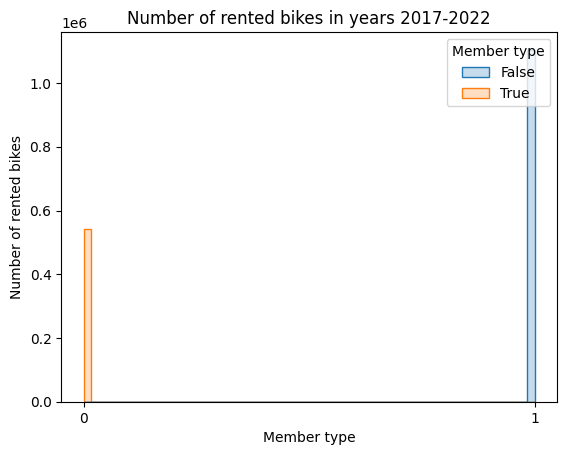

In [550]:
ax = plt.axes()

ax.set_xticks([0,1])
sns.histplot( df, x=df['Member type']=='Member', hue=df["Member type"]=='Casual',element="step")
plt.title('Number of rented bikes in years 2017-2022')
plt.ylabel('Number of rented bikes')

Text(0.5, 1.0, 'Number of rented bikes in Aprils in years 2017-2022')

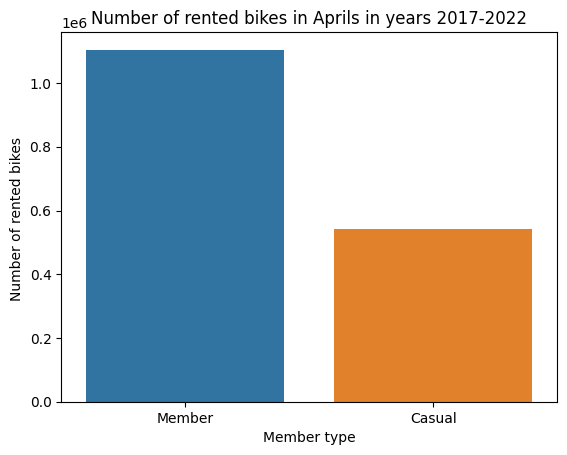

In [407]:
sns.countplot(x=df["Member type"])
plt.ylabel('Number of rented bikes ')
plt.title('Number of rented bikes in Aprils in years 2017-2022')

Group data based on month and year

In [410]:
group_df = df.groupby(["month","year"]).size()
group_df= group_df.reset_index()
group_df.columns=["month","year","Count"]
group_df

,month,year,Count
0,4,2017,365990
1,4,2018,328907
2,4,2019,347992
3,4,2020,75471
4,4,2021,216763
5,4,2022,310435


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


<AxesSubplot: xlabel='year', ylabel='Count'>

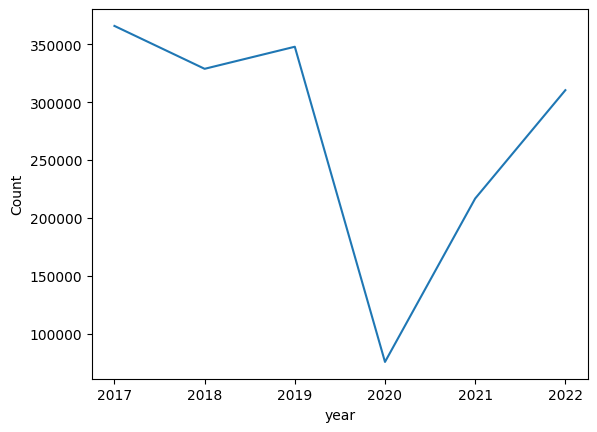

In [411]:

sns.lineplot(data = group_df,x="year",y="Count",err_style='bars')


Group data based on day and year

In [422]:
df['day']=df['Start date'].dt.day
df_g=df.groupby(['day','year']).size()
df_g= df_g.reset_index()
df_g.columns=["day","year","Count"]
df_g


/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_27440/1868115842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day']=df['Start date'].dt.day


,day,year,Count
0,1,2017,10321
1,1,2018,10468
2,1,2019,8865
3,1,2020,1765
4,1,2021,4494
...,...,...,...
175,30,2018,12334
176,30,2019,11801
177,30,2020,781
178,30,2021,6352


Plot line of bike rentals in different years. It appears that line plot is not a good choice

<AxesSubplot: xlabel='day', ylabel='Count'>

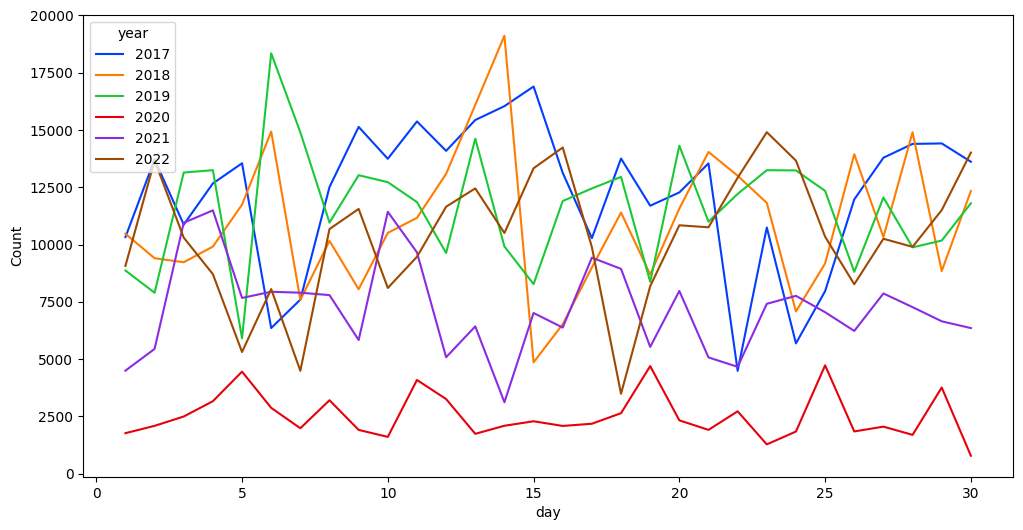

In [456]:
fig=plt.figure(figsize=(12,6))
sns.lineplot(df_g, x='day',y='Count',hue='year', palette='bright')

Bar plot seems better choice

Text(0.5, 1.0, 'effect of Corona on bike rentals')

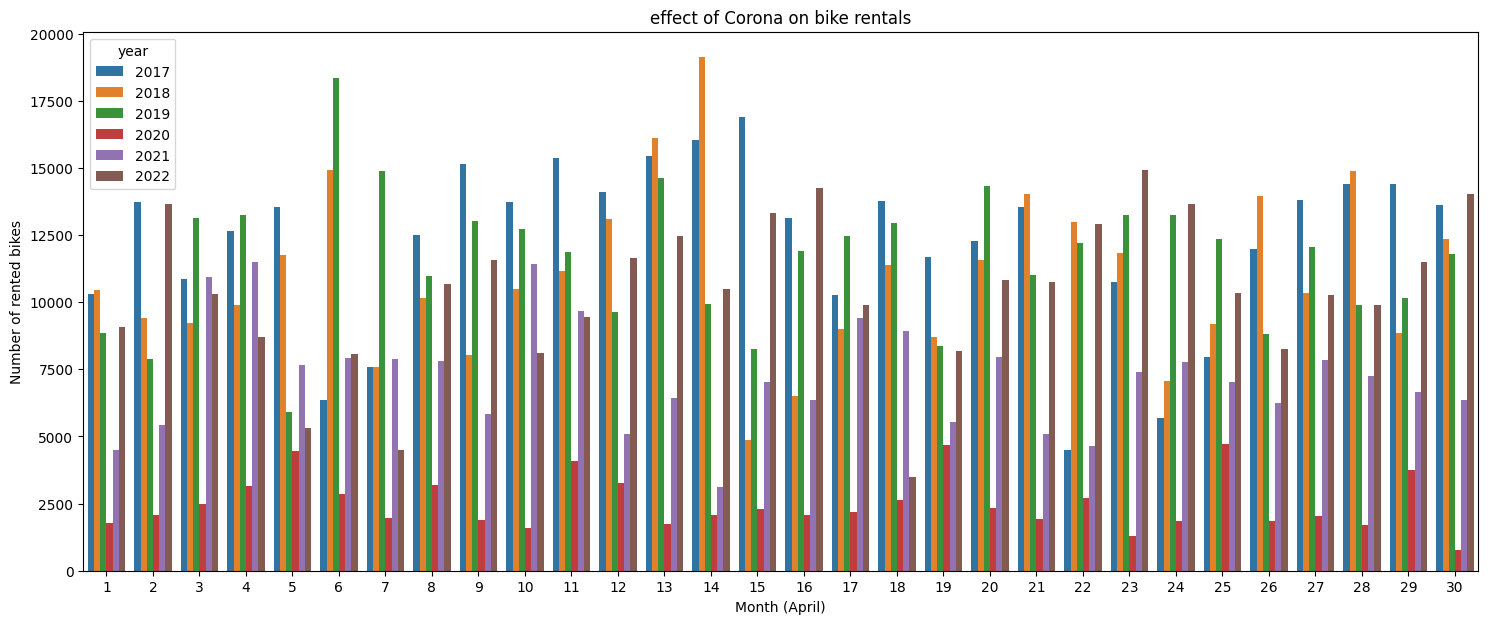

In [461]:
fig=plt.figure(figsize=(18,7))
sns.barplot(df_g, x='day',y='Count', hue='year')
plt.xlabel('Month (April)')
plt.ylabel('Number of rented bikes')
plt.title('effect of Corona on bike rentals')

Select only 2018 and 2019 datasets

In [462]:
df_g_2019_2018=df_g[(df_g['year'] ==2018) | (df_g['year'] ==2019)]

Text(0.5, 1.0, 'effect of Corona on bike rentals')

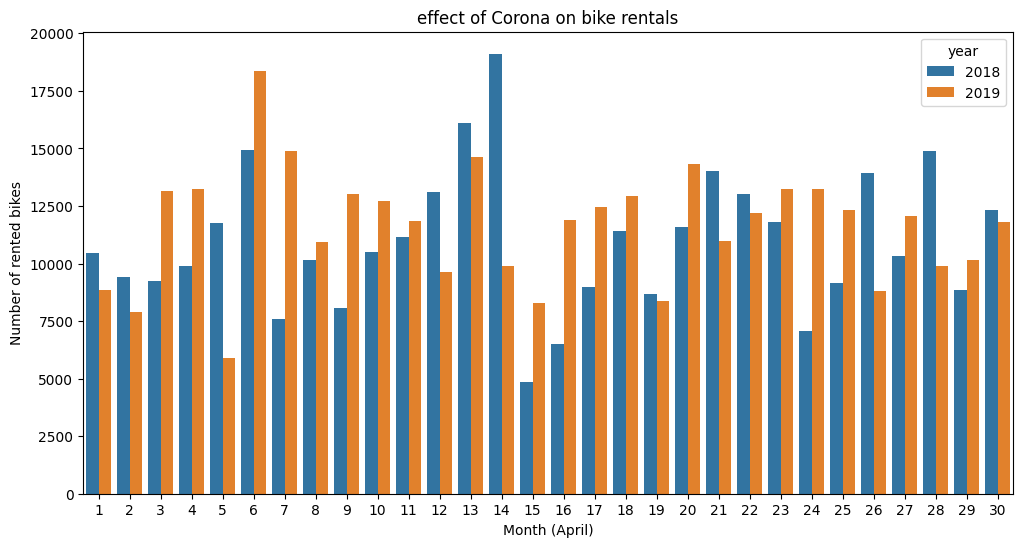

In [463]:
fig=plt.figure(figsize=(12,6))
sns.barplot(df_g_2019_2018, x='day',y='Count', hue='year')
plt.xlabel('Month (April)')
plt.ylabel('Number of rented bikes')
plt.title('effect of Corona on bike rentals')

Seperate casual and members and create group by day and years

In [529]:
df_m=df[df['Member type']=='Member']
df_c=df[df['Member type']=='Casual']
df_gm=df_m.groupby(['day','year']).size()
df_gm= df_gm.reset_index()
df_gm.columns=["day","year","Count"]
df_gc=df_c.groupby(['day','year']).size()
df_gc=df_gc.reset_index()
df_gc.columns=['day','year','Count']
df_total=df.groupby(['day','year']).size()
df_total=df_total.reset_index()
df_total.columns=['day','year','Count']

Histograms for number of bike rentals for total, member and casual users

Text(0.5, 1.0, 'effect of Corona on casual users')

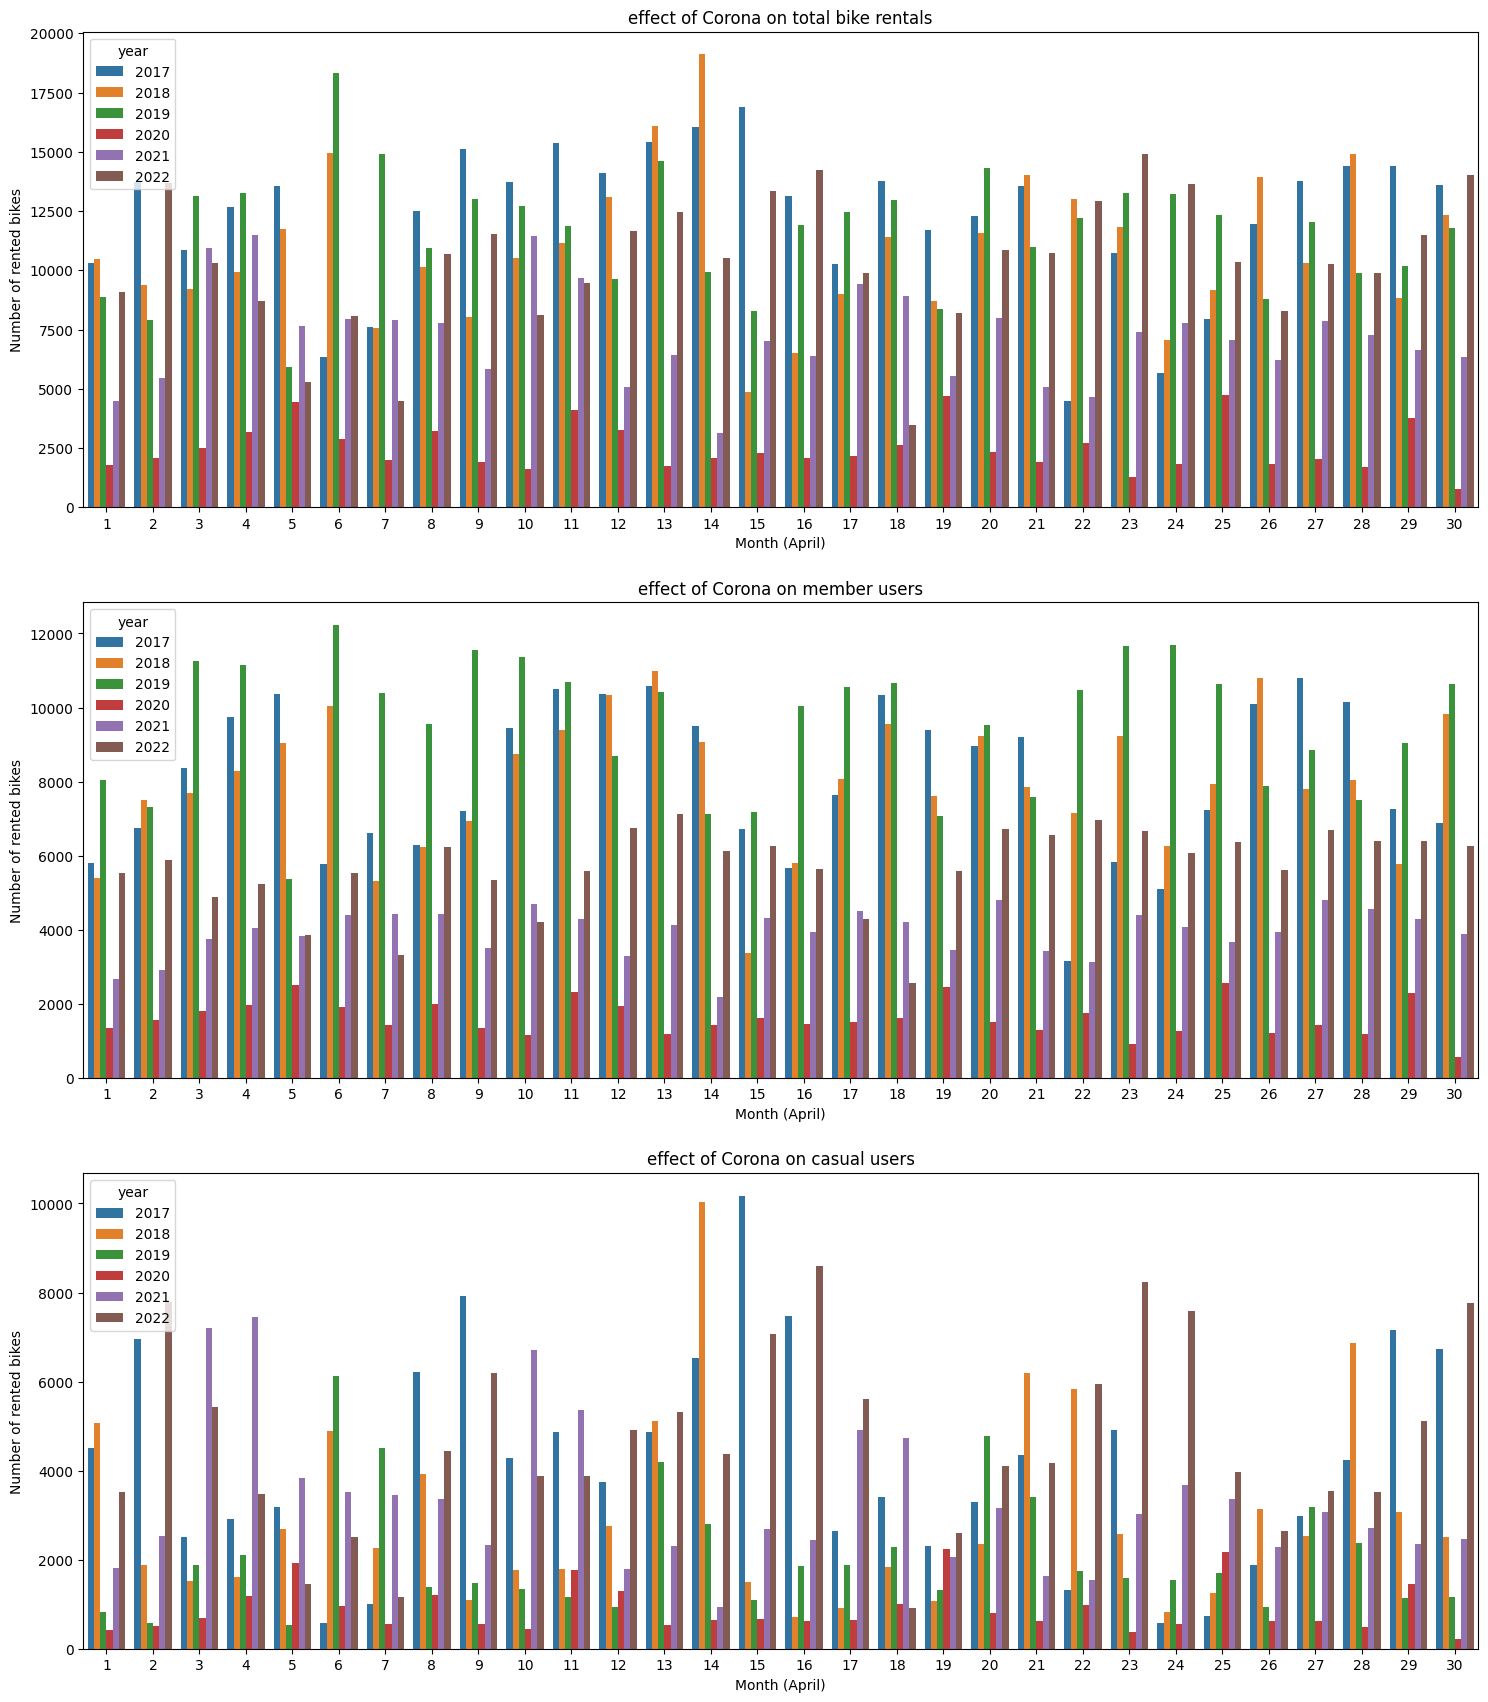

In [531]:
fig=plt.figure(figsize=(18,21))
plt.subplot2grid((3,1),(0,0))
sns.barplot(df_total, x='day',y='Count', hue='year')
plt.xlabel('Month (April)')
plt.ylabel('Number of rented bikes')
plt.title('effect of Corona on total bike rentals')
plt.subplot2grid((3,1),(1,0))
sns.barplot(df_gm, x='day',y='Count', hue='year')
plt.xlabel('Month (April)')
plt.ylabel('Number of rented bikes')
plt.title('effect of Corona on member users')

plt.subplot2grid((3,1),(2,0))
sns.barplot(df_gc, x='day',y='Count', hue='year')
plt.xlabel('Month (April)')
plt.ylabel('Number of rented bikes')
plt.title('effect of Corona on casual users')




I created daily mean valuses in different years for total, casual and member users

In [539]:
year=[]
count=[]
for i in range(6):
    result=df_gc['Count'][df_gc['year']== i+2017].mean()
    year.append(i+2017)
    count.append(result)

year=[]
count_m=[]
for i in range(6):
    result=df_gm['Count'][df_gm['year']== i+2017].mean()
    year.append(i+2017)
    count_m.append(result)

year=[]
count_t=[]
for i in range(6):
    result=df_total['Count'][df_total['year']== i+2017].mean()
    year.append(i+2017)
    count_t.append(result)



In [540]:
df_mm=pd.DataFrame({'year':year, 'count':count_m})
df_cc=pd.DataFrame({'year':year, 'count':count})
df_tt=pd.DataFrame({'year':year, 'count':count_t})



Plot of daily mean of bike rentals for total, member and casual users. It is obvious that there is a decline in the curves of total and member users between 2019-2020 , then all curves are inclining almost with the same slope. It would be nice to be investigate the resean of  declining  the number of casual users in years 2017-2019 (even before Corona). 

Text(0.5, 1.0, 'Effect of Corona on bike rental')

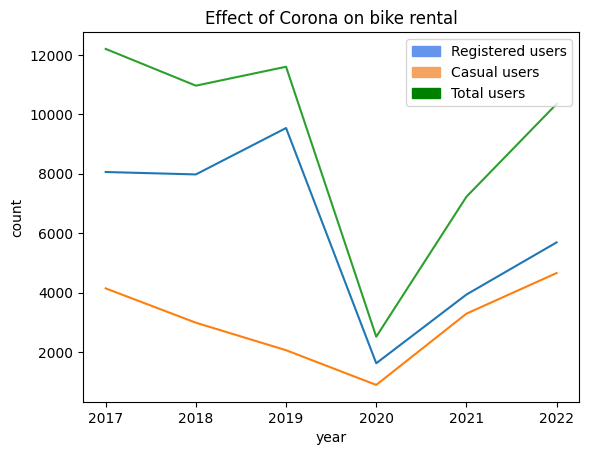

In [551]:
sns.lineplot(df_mm,x='year',y='count')
sns.lineplot(df_cc,x='year',y='count')
sns.lineplot(df_tt,x='year',y='count')
p_a = mpatches.Patch(color='cornflowerblue', label='Registered users')
p_b = mpatches.Patch(color='sandybrown', label='Casual users')
p_c=mpatches.Patch(color='green', label='Total users')
plt.legend(handles=[p_a,p_b,p_c], loc='upper right')
plt.title('Effect of Corona on bike rental')
